In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_altered = df_original.copy()
df_DA_US = df_altered[(df_altered['job_title_short']== 'Data Analyst') & (df_altered['job_country']== 'United States')]
#drops NaN values
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

In [11]:
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_TOP_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)
df_DA_US_TOP_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [27]:
df_DA_US_TOP_Skills_Count = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_DA_US_TOP_Skills_Count

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


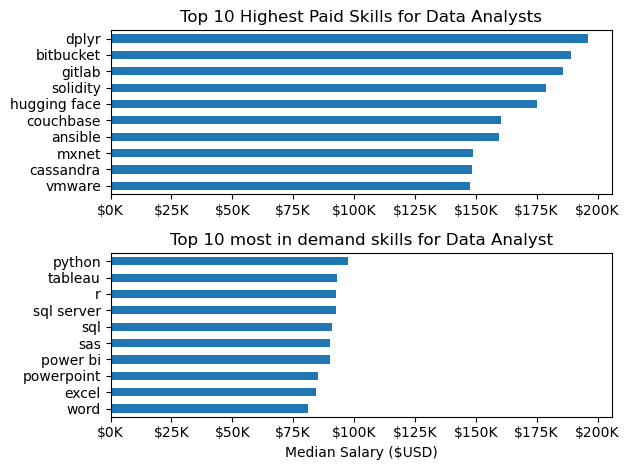

In [55]:
fig, ax = plt.subplots(2 , 1)


df_DA_US_TOP_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # or ax[0].invert_yaxis() ro reverse
df_DA_US_TOP_Skills_Count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts') 
ax[0].set_ylabel('') 
ax[0].set_xlabel('')
ax[1].set_title('Top 10 most in demand skills for Data Analyst') 
ax[1].set_ylabel('') 
ax[1].set_xlabel('Median Salary ($USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) #matches axes
fig.tight_layout() 